In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Expanded_data_with_more_features.csv")

In [3]:
df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [8]:
df.describe()

,NrSiblings,MathScore,ReadingScore,WritingScore
count,29069.000000,30641.000000,30641.000000,30641.000000
mean,2.145894,66.558402,69.377533,68.418622
std,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,10.000000,4.000000
25%,1.000000,56.000000,59.000000,58.000000
50%,2.000000,67.000000,70.000000,69.000000
75%,3.000000,78.000000,80.000000,79.000000
max,7.000000,100.000000,100.000000,100.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [5]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [9]:
df= df.drop("Unnamed: 0",axis =1)
print(df.head())

KeyError: "['Unnamed: 0'] not found in axis"

# change weekly study hours column


In [10]:
# df["WklyStudyHours"] = df["WklyStudyHours"].str.replace(" 5 - 10 ")

# gender distribution

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

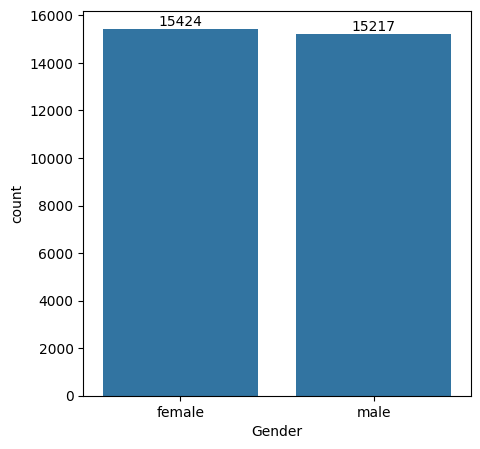

In [13]:
plt.figure(figsize = (5,5))
ax =sns.countplot(data = df, x= "Gender")
ax.bar_label(ax.containers[0])
plt.show()

In [14]:
 gb=  df.groupby("ParentEduc").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


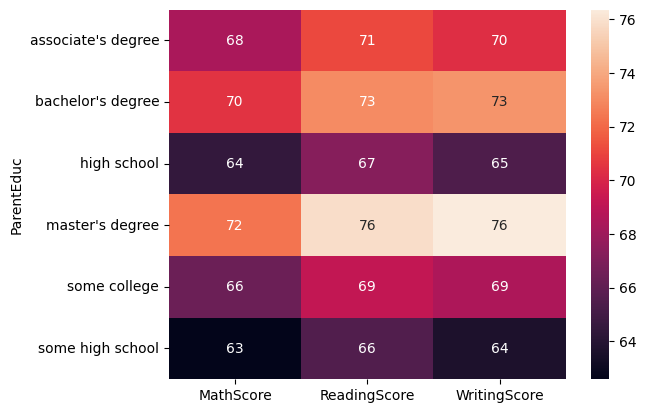

In [15]:
sns.heatmap(gb, annot= True)
plt.show()

In [16]:
#from above chart  we can conclude that education of parents have good impact on scores of children

In [17]:
gb=  df.groupby("ParentMaritalStatus").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


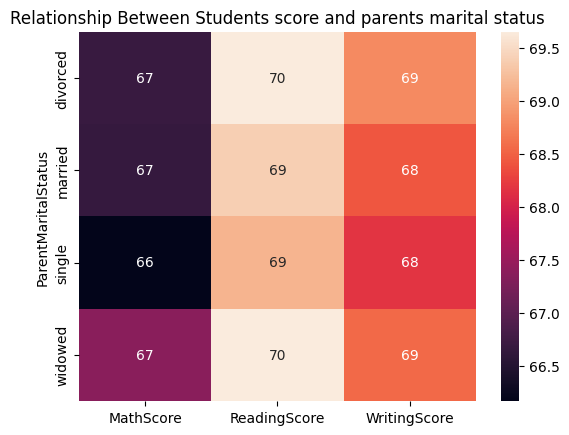

In [18]:
plt.title("Relationship Between Students score and parents marital status")
sns.heatmap(gb, annot= True)
plt.show()

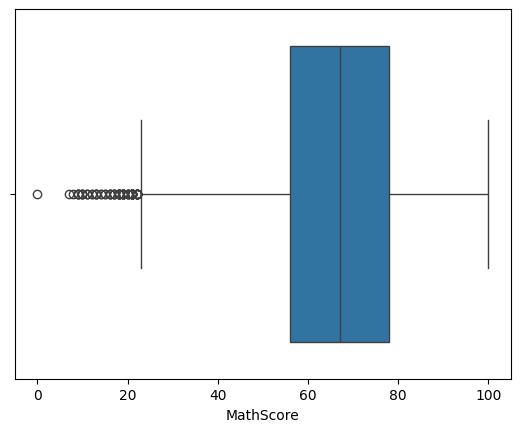

In [19]:
sns.boxplot(data = df, x="MathScore")
plt.show()

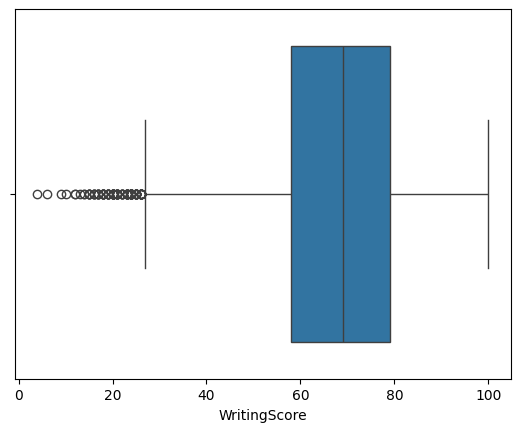

In [20]:
sns.boxplot(data = df, x="WritingScore")
plt.show()

In [21]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


# distribution of ethnic group

In [22]:
print(df["EthnicGroup"].count())

28801


In [23]:
gb2 = df.groupby("EthnicGroup").count()

In [24]:
gb2

,Gender,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
EthnicGroup,,,,,,,,,,,,,
group A,2219,2078,2219,2081,2121,2167,2168,2096,1999,2146,2219,2219,2219
group B,5826,5470,5826,5488,5605,5704,5649,5546,5238,5642,5826,5826,5826
group C,9212,8652,9212,8652,8858,9050,8929,8763,8280,8933,9212,9212,9212
group D,7503,7056,7503,7070,7218,7343,7285,7106,6713,7270,7503,7503,7503
group E,4041,3814,4041,3804,3892,3954,3918,3820,3624,3924,4041,4041,4041


Text(0.5, 1.0, 'Distribution of ethnic groups')

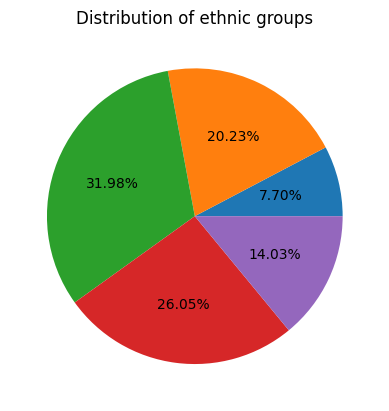

In [25]:
plt.pie( gb2.Gender, autopct = "%1.2f%%")
plt.title('Distribution of ethnic groups')